<a href="https://colab.research.google.com/github/vicentbas/ia3_uv/blob/main/Copia_de_ML_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

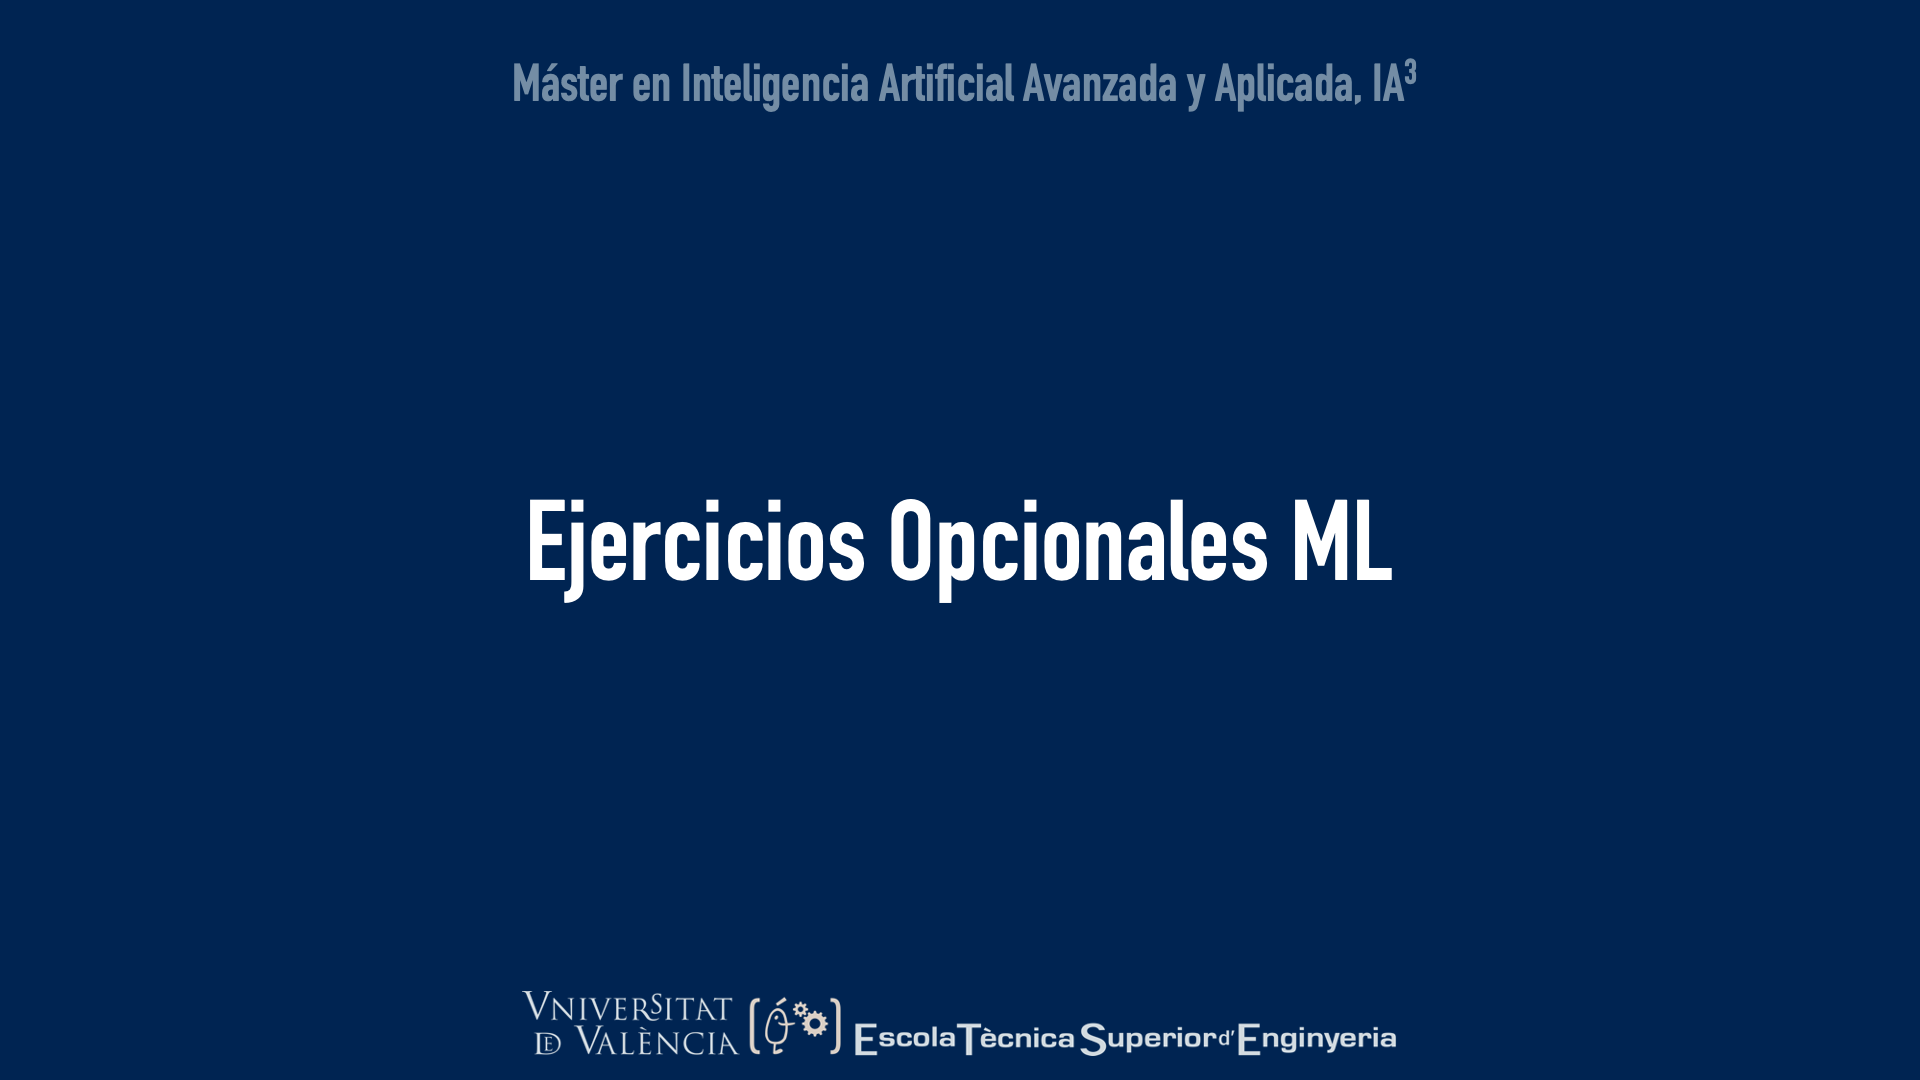

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.


# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [2]:
np.random.seed(123)
dataset = pd.DataFrame(sns.load_dataset("penguins")).dropna()

lb_make = LabelEncoder()
dataset["sex_code"] = lb_make.fit_transform(dataset["sex"])

In [3]:
y = dataset["sex_code"]
X = dataset.drop(columns=['sex','sex_code'])
X = pd.get_dummies(X,columns=["island","species"])

Feature: 0-bill_length_mm 	 Score: 0.17466233407208065
Feature: 1-bill_depth_mm 	 Score: 0.37962266796076255
Feature: 2-flipper_length_mm 	 Score: 0.04202219970320876
Feature: 3-body_mass_g 	 Score: 0.3732125875377645
Feature: 4-island_Biscoe 	 Score: 0.005041871537499275
Feature: 5-island_Dream 	 Score: 0.005456446122869916
Feature: 6-island_Torgersen 	 Score: 0.003900033081325065
Feature: 7-species_Adelie 	 Score: 0.0064708275501447945
Feature: 8-species_Chinstrap 	 Score: 0.009520941531812283
Feature: 9-species_Gentoo 	 Score: 9.009090253228483e-05


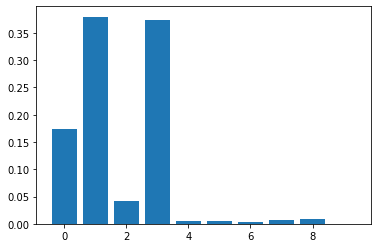

In [4]:
# define the model
model_imp = RandomForestRegressor()
# fit the model model.fit(X_train, y_train)
model_imp.fit(X, y)
# get importance
importance = model_imp.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print(f'Feature: {i}-{X.columns[i]} \t Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [5]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,0,0,1
340,46.8,14.3,215.0,4850.0,1,0,0,0,0,1
341,50.4,15.7,222.0,5750.0,1,0,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,0,0,1


In [6]:
X = X.drop(columns=['island_Biscoe','island_Dream','island_Torgersen','species_Adelie','species_Chinstrap','species_Gentoo'])

In [7]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [8]:
X = X.drop(columns=['flipper_length_mm'])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = logreg.predict(X_test)

In [12]:
print(f"Score: {logreg.score(X_train, y_train)}")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(f"F1_micro: {metrics.f1_score(y_test, y_pred, average='micro')}")
print(f"Balanced: {metrics.balanced_accuracy_score(y_test, y_pred)}")

Score: 0.8969957081545065
Accuracy: 0.89
F1_micro: 0.89
Balanced: 0.8902047370533922


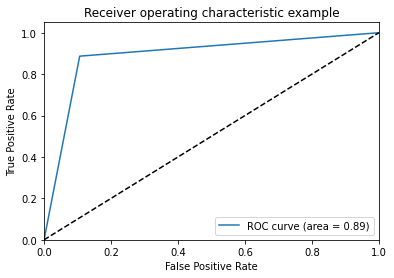

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [14]:
import warnings
warnings.filterwarnings('ignore')
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solv in solver:
  std_slc = StandardScaler()
  pca = decomposition.PCA()
  logistic_Reg = linear_model.LogisticRegression(solver=solv)
  pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca),('logistic_Reg', logistic_Reg)])
  n_components = list(range(1,X.shape[1]+1,1))
  C = np.logspace(-4, 4, 50)
  penalty = ['l1', 'l2']
  parameters = dict(pca__n_components=n_components,logistic_Reg__C=C,logistic_Reg__penalty=penalty)
  clf_GS = GridSearchCV(pipe, parameters)
  clf_GS.fit(X, y)
  print('Solver: ',solv)
  print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
  print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
  print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
  print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Solver:  newton-cg
Best Penalty: l2
Best C: 0.5689866029018293
Best Number Of Components: 3

LogisticRegression(C=0.5689866029018293, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Solver:  lbfgs
Best Penalty: l2
Best C: 0.5689866029018293
Best Number Of Components: 3

LogisticRegression(C=0.5689866029018293, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Solver:  liblinear
Best Penalty: l1
Best C: 0.5689866029018293
Best Number Of Components: 3

LogisticRegression(C=0.5689866029018293

In [20]:
logreg = LogisticRegression(C=0.5689,solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f"Score: {logreg.score(X_train, y_train)}")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(f"F1_micro: {metrics.f1_score(y_test, y_pred, average='micro')}")
print(f"Balanced: {metrics.balanced_accuracy_score(y_test, y_pred)}")

Score: 0.8884120171673819
Accuracy: 0.92
F1_micro: 0.92
Balanced: 0.918506623845845


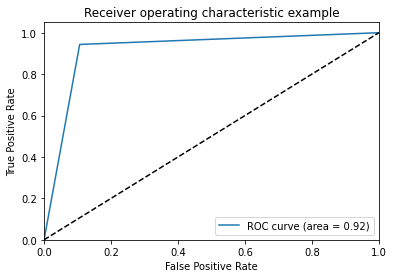

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()